In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../script')))


In [12]:
from data_cleaner import Data_cleaner
from outlier import Outlier 
from visualizer2 import *

In [241]:
sys.path.append(os.path.abspath(os.path.join('../script')))

In [244]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
db = pd.read_csv('C:/Users/Hikma Brhan/User-Analytics-Telecomm-Industry/data/Week1_challenge_data_source(CSV) (1).csv', na_values=missing_values)
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [245]:
# rows and columns in the def
db.shape

(150001, 55)

In [246]:
# reading the field descriptions file
df_descript = pd.read_excel("../data/Field Descriptions.xlsx")
df_descript

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


In [247]:
db = Data_cleaner().drop_duplicate(db)
db.shape

(150001, 55)

In [248]:
db = Data_cleaner().drop_duplicate(db)
db.shape

(150001, 55)

In [249]:
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [250]:


Data_cleaner().percent_missing_values(db)

The Telecom dataset contains 12.72 % missing values.


### Missing Values

In [251]:
 Data_cleaner().percent_missing_values(db)

The Telecom dataset contains 12.72 % missing values.


In [252]:
missing_df = Data_cleaner.missing_values_table(db)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


In [253]:
missing_df.shape

(41, 3)

In [254]:
missing_df.head(20)

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.84,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,float64
Nb of sec with 125000B < Vol DL,97538,65.02,float64
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
HTTP UL (Bytes),81810,54.54,float64
HTTP DL (Bytes),81474,54.32,float64


#### it is good to remove columns with more than 30% of missing values.

In [255]:
missing_big = missing_df[missing_df['% of Total Values'] >=30.00].index.tolist()
missing_big

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [256]:
olumns_skewed = ['TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)']

In [257]:
print(db['TCP UL Retrans. Vol (Bytes)'].skew())
print(db['TCP DL Retrans. Vol (Bytes)'].skew())

84.1133930476764
15.951808879964869


In [258]:
drop_columns = [col for col in missing_big if col not in columns_skewed]
drop_columns 

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [259]:
db = db.drop(columns_to_remove,axis=1)

In [260]:
db.shape

(150001, 47)

In [261]:
 Data_cleaner().percent_missing_values(db)

The Telecom dataset contains 3.85 % missing values.


In [262]:
Data_cleaner.missing_values_table(db)

Your selected dataframe has 47 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values,Dtype
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
Avg RTT DL (ms),27829,18.55,float64
Avg RTT UL (ms),27812,18.54,float64
Handset Type,9559,6.37,object
Handset Manufacturer,9559,6.37,object
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64


In [263]:
Data_cleaner.fix_missing_bfill(db,['TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)'])

0         19520.0
1         19520.0
2         19520.0
3         19520.0
4         19520.0
           ...   
149996        NaN
149997        NaN
149998        NaN
149999        NaN
150000        NaN
Name: TCP DL Retrans. Vol (Bytes), Length: 150001, dtype: float64

### Avg RTT DL (ms) and Avg RTT UL (ms) have 18.54% and 18.55% respectively

In [264]:
print(db['Avg RTT DL (ms)'].skew(skipna=True))
print(db['Avg RTT UL (ms)'].skew(skipna=True))

62.90782807995961
28.45741458546382


In [265]:
db= Data_cleaner.fix_missing_ffill(db,['Avg RTT DL (ms)','Avg RTT UL (ms)'])

In [266]:
Data_cleaner().percent_missing_values(db)

The Telecom dataset contains 0.44 % missing values.


In [267]:
Data_cleaner.missing_values_table(db)

Your selected dataframe has 47 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Handset Type,9559,6.37,object
Handset Manufacturer,9559,6.37,object
Last Location Name,1153,0.77,object
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.53,float64
UL TP < 10 Kbps (%),792,0.53,float64


### Fill the missing values of Handset Type and Handset Manufacturer

#### Handset Type and handset Manufacturer are categorical columns , it is better to fill them with "unknown".

In [268]:
Data_cleaner.fix_missing_value(db, 'Handset Type', 'unknown')
Data_cleaner.fix_missing_value(db, 'Handset Manufacturer', 'unknown')

9559 missing values in the column Handset Type have been replaced by unknown.
9559 missing values in the column Handset Manufacturer have been replaced by unknown.


0         Samsung
1         Samsung
2         Samsung
3         unknown
4         Samsung
           ...   
149996      Apple
149997      Apple
149998      Apple
149999     Huawei
150000    unknown
Name: Handset Manufacturer, Length: 150001, dtype: object

In [269]:
Data_cleaner().percent_missing_values(db)

The Telecom dataset contains 0.17 % missing values.


#### we are left with small persentage of null values. so it is better if we remove the from data.

In [270]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150001 entries, 0 to 150000
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149010 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            149431 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            149429 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

In [271]:
missing_big = missing_df[missing_df['% of Total Values'] >=30.00].index.tolist()
missing_big

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [272]:
db.dropna(inplace=True)

In [273]:
Data_cleaner().percent_missing_values(db)

The Telecom dataset contains 0.0 % missing values.


### Data Types

In [274]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       146887 non-null  float64
 1   Start                           146887 non-null  object 
 2   Start ms                        146887 non-null  float64
 3   End                             146887 non-null  object 
 4   End ms                          146887 non-null  float64
 5   Dur. (ms)                       146887 non-null  float64
 6   IMSI                            146887 non-null  float64
 7   MSISDN/Number                   146887 non-null  float64
 8   IMEI                            146887 non-null  float64
 9   Last Location Name              146887 non-null  object 
 10  Avg RTT DL (ms)                 146887 non-null  float64
 11  Avg RTT UL (ms)                 146887 non-null  float64
 12  Avg Bearer TP DL

In [275]:
db

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,7.349883e+18,4/29/2019 7:28,794.0,4/30/2019 0:36,523.0,61661.0,2.082017e+14,3.376215e+10,3.586061e+13,D10033B,...,7404819.0,9864285.0,18954727.0,19382787.0,258688968.0,9542486.0,249358264.0,14134902.0,57231077.0,295424923.0
149992,1.311448e+19,4/29/2019 7:28,114.0,4/30/2019 7:04,724.0,84940.0,2.082014e+14,3.376127e+10,3.532701e+13,D78058B,...,22428728.0,14385815.0,6940672.0,6801943.0,35738570.0,7842728.0,808482329.0,12135519.0,45923464.0,70341448.0
149993,1.311448e+19,4/29/2019 7:28,79.0,4/30/2019 18:22,512.0,125622.0,2.082014e+14,3.362611e+10,3.573531e+13,D73542B,...,18144703.0,8161828.0,20559422.0,20415237.0,569668054.0,1618788.0,168292600.0,11056036.0,43629118.0,623318363.0
149994,1.311448e+19,4/29/2019 7:28,83.0,4/30/2019 15:01,268.0,113545.0,2.082003e+14,3.364566e+10,3.515541e+13,T88383B,...,23043782.0,19176074.0,18762809.0,9591310.0,810666072.0,14858904.0,777865837.0,14693970.0,59377936.0,862796008.0


### Data type for Start and End Columns of the dataset is so lets as convet it to date time datatype

In [276]:
Data_cleaner.convert_to_datetime(db,['Start','End'])

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,7.349883e+18,2019-04-29 07:28:00,794.0,2019-04-30 00:36:00,523.0,61661.0,2.082017e+14,3.376215e+10,3.586061e+13,D10033B,...,7404819.0,9864285.0,18954727.0,19382787.0,258688968.0,9542486.0,249358264.0,14134902.0,57231077.0,295424923.0
149992,1.311448e+19,2019-04-29 07:28:00,114.0,2019-04-30 07:04:00,724.0,84940.0,2.082014e+14,3.376127e+10,3.532701e+13,D78058B,...,22428728.0,14385815.0,6940672.0,6801943.0,35738570.0,7842728.0,808482329.0,12135519.0,45923464.0,70341448.0
149993,1.311448e+19,2019-04-29 07:28:00,79.0,2019-04-30 18:22:00,512.0,125622.0,2.082014e+14,3.362611e+10,3.573531e+13,D73542B,...,18144703.0,8161828.0,20559422.0,20415237.0,569668054.0,1618788.0,168292600.0,11056036.0,43629118.0,623318363.0
149994,1.311448e+19,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,113545.0,2.082003e+14,3.364566e+10,3.515541e+13,T88383B,...,23043782.0,19176074.0,18762809.0,9591310.0,810666072.0,14858904.0,777865837.0,14693970.0,59377936.0,862796008.0


In [277]:
db.dtypes

Bearer Id                                float64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [278]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146887 non-null  float64       
 1   Start                           146887 non-null  datetime64[ns]
 2   Start ms                        146887 non-null  float64       
 3   End                             146887 non-null  datetime64[ns]
 4   End ms                          146887 non-null  float64       
 5   Dur. (ms)                       146887 non-null  float64       
 6   IMSI                            146887 non-null  float64       
 7   MSISDN/Number                   146887 non-null  float64       
 8   IMEI                            146887 non-null  float64       
 9   Last Location Name              146887 non-null  object        
 10  Avg RTT DL (ms)                 146887 non-null  float64

### Now change the column with object datatype to stirng

In [279]:
# get the columns with object data type
string_columns = db.select_dtypes(include='object').columns.tolist()
string_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [280]:
Data_cleaner.convert_to_string(db,string_columns)

In [281]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146887 non-null  float64       
 1   Start                           146887 non-null  datetime64[ns]
 2   Start ms                        146887 non-null  float64       
 3   End                             146887 non-null  datetime64[ns]
 4   End ms                          146887 non-null  float64       
 5   Dur. (ms)                       146887 non-null  float64       
 6   IMSI                            146887 non-null  float64       
 7   MSISDN/Number                   146887 non-null  float64       
 8   IMEI                            146887 non-null  float64       
 9   Last Location Name              146887 non-null  string        
 10  Avg RTT DL (ms)                 146887 non-null  float64

### Convet for the identification numbert to int

In [282]:
#Data_cleaner.convert_to_int(db, ["Bearer Id","IMSI","MSISDN/Number", "IMEI" ])

In [283]:
db

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,7.349883e+18,2019-04-29 07:28:00,794.0,2019-04-30 00:36:00,523.0,61661.0,2.082017e+14,3.376215e+10,3.586061e+13,D10033B,...,7404819.0,9864285.0,18954727.0,19382787.0,258688968.0,9542486.0,249358264.0,14134902.0,57231077.0,295424923.0
149992,1.311448e+19,2019-04-29 07:28:00,114.0,2019-04-30 07:04:00,724.0,84940.0,2.082014e+14,3.376127e+10,3.532701e+13,D78058B,...,22428728.0,14385815.0,6940672.0,6801943.0,35738570.0,7842728.0,808482329.0,12135519.0,45923464.0,70341448.0
149993,1.311448e+19,2019-04-29 07:28:00,79.0,2019-04-30 18:22:00,512.0,125622.0,2.082014e+14,3.362611e+10,3.573531e+13,D73542B,...,18144703.0,8161828.0,20559422.0,20415237.0,569668054.0,1618788.0,168292600.0,11056036.0,43629118.0,623318363.0
149994,1.311448e+19,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,113545.0,2.082003e+14,3.364566e+10,3.515541e+13,T88383B,...,23043782.0,19176074.0,18762809.0,9591310.0,810666072.0,14858904.0,777865837.0,14693970.0,59377936.0,862796008.0


In [284]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       146887 non-null  float64       
 1   Start                           146887 non-null  datetime64[ns]
 2   Start ms                        146887 non-null  float64       
 3   End                             146887 non-null  datetime64[ns]
 4   End ms                          146887 non-null  float64       
 5   Dur. (ms)                       146887 non-null  float64       
 6   IMSI                            146887 non-null  float64       
 7   MSISDN/Number                   146887 non-null  float64       
 8   IMEI                            146887 non-null  float64       
 9   Last Location Name              146887 non-null  string        
 10  Avg RTT DL (ms)                 146887 non-null  float64

In [285]:
db.to_csv('../data/preprocessed_data.csv')

In [7]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
db = pd.read_csv('C:/Users/Hikma Brhan/User-Analytics-Telecomm-Industry/data/preprocessed_data.csv', na_values=missing_values)
db.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [9]:
#Top ten handsets 
Top_handsets = pd.DataFrame({'number of users':db.groupby(['Handset Type'])['Bearer Id'].count()}).reset_index()
Top_handsets = Top_handsets.sort_values(['number of users'],ascending=False)
print("\nTOP TEN HANDSETS")
Top_handsets.head(10)


TOP TEN HANDSETS


,Handset Type,number of users
308,Huawei B528S-23A,19373
52,Apple iPhone 6S (A1688),9369
48,Apple iPhone 6 (A1586),8967
1362,unknown,8820
58,Apple iPhone 7 (A1778),6240
72,Apple iPhone Se (A1723),5150
65,Apple iPhone 8 (A1905),4961
77,Apple iPhone Xr (A2105),4542
928,Samsung Galaxy S8 (Sm-G950F),4404
74,Apple iPhone X (A1901),3788


In [10]:
#top  3 handset manufacturers
Top_Three_handset_manf = pd.DataFrame({'handsets manufactured':db.groupby(['Handset Manufacturer'])['Bearer Id'].count()}).reset_index()
Top_Three_handset_manf = Top_Three_handset_manf.sort_values(['handsets manufactured'],ascending=False).reset_index()
print('\nTOP THREE HANDSET MANUFACTURERES\n')
Top_Three_handset_manf.head(3)


TOP THREE HANDSET MANUFACTURERES



,index,Handset Manufacturer,handsets manufactured
0,5,Apple,59069
1,102,Samsung,39902
2,52,Huawei,33754


In [11]:
#top 5 handsets per top 3 handset manufacturer
# df_handset_manf[df_handset_manf["Handset Manufacturer"] == "Apple"]
top_handset_apple = db.groupby(['Handset Manufacturer']).get_group('Apple')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
top_handset_samsung = db.groupby(['Handset Manufacturer']).get_group('Samsung')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
top_handset_huawei= db.groupby(['Handset Manufacturer']).get_group('Huawei')[["Handset Type","Bearer Id"]].sort_values(by="Bearer Id",ascending=False)
print(top_handset_apple.head(5),"\n\n")
print(top_handset_samsung.head(5),"\n\n")
print(top_handset_huawei.head(5))

                       Handset Type     Bearer Id
116074  Apple iPhone 7 Plus (A1784)  1.318654e+19
115966  Apple iPhone 7 Plus (A1784)  1.318654e+19
91279        Apple iPhone 6 (A1549)  1.318654e+19
90066       Apple iPhone Se (A1723)  1.318654e+19
89910       Apple iPhone 6S (A1688)  1.318654e+19 


                             Handset Type     Bearer Id
115155       Samsung Galaxy S7 (Sm-G930X)  1.318654e+19
94932                   Samsung Galaxy J6  1.318654e+19
88670   Samsung Galaxy S9 Plus (Sm-G965F)  1.318654e+19
85545        Samsung Galaxy S8 (Sm-G950F)  1.318654e+19
84106         Samsung Galaxy J3 (Sm-J330)  1.318654e+19 


            Handset Type     Bearer Id
141397    Huawei P20 Pro  1.318654e+19
135284  Huawei B525S-23A  1.318654e+19
134689  Huawei B525S-23A  1.318654e+19
129529    Huawei P20 Pro  1.318654e+19
119273  Huawei B525S-23A  1.318654e+19


### Overview

In [12]:
#number of xDR sessions
xdr_session = db.groupby('MSISDN/Number').agg({'Bearer Id': 'count' }).reset_index()
xdr_session['no.xdr_session'] = xdr_session['Bearer Id']
xdr2 = xdr_session.groupby('MSISDN/Number').agg({'no.xdr_session': 'sum'}).reset_index()
xdr2.head(10)

,MSISDN/Number,no.xdr_session
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
5,3.360101e+10,2
6,3.360101e+10,2
7,3.360101e+10,1
8,3.360101e+10,2
9,3.360102e+10,1


In [13]:
#Session duration
Session_duration = db.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum',}).reset_index()
Session_duration.head(10)

,MSISDN/Number,Dur. (ms)
0,3.360100e+10,116720.0
1,3.360100e+10,181230.0
2,3.360100e+10,134969.0
3,3.360101e+10,49878.0
4,3.360101e+10,37104.0
5,3.360101e+10,253983.0
6,3.360101e+10,128360.0
7,3.360101e+10,86399.0
8,3.360101e+10,495702.0
9,3.360102e+10,124854.0


In [14]:
#the total download (DL) and upload (UL) data
db['Total(UL/DL)'] = db['Total UL (Bytes)'] + db['Total DL (Bytes)']
total_ul_dl = db.groupby('MSISDN/Number').agg({'Total(UL/DL)':'sum'}).reset_index()
total_ul_dl.head(10)

,MSISDN/Number,Total(UL/DL)
0,3.360100e+10,8.786906e+08
1,3.360100e+10,1.568596e+08
2,3.360100e+10,5.959665e+08
3,3.360101e+10,4.223207e+08
4,3.360101e+10,1.457411e+09
5,3.360101e+10,6.152172e+08
6,3.360101e+10,6.547231e+08
7,3.360101e+10,3.326604e+08
8,3.360101e+10,9.901322e+08
9,3.360102e+10,7.324638e+08


In [32]:
#the total data volume (in Bytes) during this session for each application
total_volume = db.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_volume.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
3.373168e+10,4.205055e+10,1.794349e+11,5.203937e+10,5.218528e+11,5.210680e+11,9.814774e+12,9.898256e+12,1.132079e+13
3.360304e+10,1.504110e+09,6.459644e+09,1.858897e+09,1.848394e+10,1.844891e+10,3.576796e+11,3.460300e+11,4.111824e+11
3.361489e+10,2.829454e+07,1.279738e+08,4.078863e+07,3.943702e+08,3.614010e+08,7.749432e+09,7.639264e+09,8.846226e+09
3.362578e+10,2.713550e+07,1.423079e+08,4.063397e+07,4.529588e+08,3.569806e+08,7.326673e+09,6.354583e+09,8.499621e+09
3.362632e+10,4.337478e+07,1.521919e+08,4.241878e+07,3.744830e+08,3.287257e+08,6.887572e+09,8.167878e+09,7.971167e+09
3.367588e+10,1.922292e+07,1.098605e+08,3.151442e+07,3.174106e+08,3.090932e+08,6.970568e+09,6.798515e+09,7.891111e+09
3.365973e+10,3.541236e+07,1.165163e+08,3.599979e+07,2.579911e+08,3.995191e+08,6.725559e+09,6.317415e+09,7.705863e+09
3.366646e+10,1.862999e+07,8.932074e+07,2.555714e+07,2.273360e+08,2.144169e+08,6.646303e+09,4.349141e+09,7.308501e+09
3.366471e+10,1.939060e+07,9.038937e+07,2.142601e+07,2.768340e+08,2.517988e+08,6.103856e+09,3.976960e+09,6.872337e+09


### Outlier Analysis 

In [16]:
db.shape

(146887, 49)

In [19]:
Outlier = Outlier(db)

In [20]:
columns = db.select_dtypes('float64').columns.tolist()
columns

['Bearer Id',
 'Start ms',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)',
 'Total(UL/D

In [21]:
Outlier.getOverview(columns)

Name of columns,DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Nb of sec with Vol UL < 1250B,Nb of sec with Vol DL < 6250B,MSISDN/Number,UL TP < 10 Kbps (%),TCP DL Retrans. Vol (Bytes),...,Email UL (Bytes),Email DL (Bytes),Google UL (Bytes),Google DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Start ms,IMEI,End ms,Total(UL/DL)
Min,0.0,0.0,0.0,0.0,0.0,1.0,1.0,33601001722.0,0.0,2.0,...,2.0,14.0,3.0,207.0,0.0,12.0,0.0,440015202000.0,0.0,28956107.0
Q1,0.0,0.0,0.0,15418.0,22073.0,107.0,87.0,33651277843.0,99.0,24895.0,...,233439.0,892573.0,1024371.5,2882586.5,16431.0,898089.0,250.0,35460708504681.0,251.0,284477728.5
Median,0.0,0.0,0.0,39726.0,47180.0,217.0,201.0,33663690454.0,100.0,391635.0,...,466357.0,1793613.0,2054793.0,5766724.0,32908.0,1793409.0,499.0,35721809047464.0,500.0,496920698.0
Q3,0.0,0.0,1.0,697298.5,611803.0,2466.5,2612.5,33683436963.0,100.0,3078146.0,...,700297.5,2689818.0,3088071.5,8625551.0,49326.5,2694640.0,749.0,86119704328231.0,750.0,706640853.5
Max,94.0,98.0,76.0,136536461.0,144911293.0,604122.0,604061.0,337000037000919.0,100.0,4294425570.0,...,936418.0,3586146.0,4121357.0,11462832.0,65870.0,3586064.0,999.0,99001201327774.0,999.0,955984776.0
IQR,0.0,0.0,1.0,681880.5,589730.0,2359.5,2525.5,32159120.0,1.0,3053251.0,...,466858.5,1797245.0,2063700.0,5742964.5,32895.5,1796551.0,499.0,50658995823550.0,499.0,422163125.0
Lower fence,0.0,0.0,-1.5,-1007402.75,-862522.0,-3432.25,-3701.25,33603039163.0,97.5,-4554981.5,...,-466848.75,-1803294.5,-2071178.5,-5731860.25,-32912.25,-1796737.5,-498.5,-40527785230644.0,-497.5,-348766959.0
Upper fence,0.0,0.0,2.5,1720119.25,1496398.0,6005.75,6400.75,33731675643.0,101.5,7658022.5,...,1400585.25,5385685.5,6183621.5,17239997.75,98669.75,5389466.5,1497.5,162108198063556.0,1498.5,1339885541.0
Skew,5.345557,10.941071,4.503234,5.821286,7.321154,7.467915,9.009273,383.258397,-8.958674,16.755094,...,0.007312,-0.002659,0.002242,-0.008414,0.000258,-0.001633,0.000823,1.07738,-0.001251,-0.002845
Number_of_outliers,36594,31509,29343,26126,25501,24870,24604,23786,21811,21625,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#fix the outliers 
Outlier.replace_outliers_with_fences(columns)

In [23]:
print('Outliers are removed')
Outlier.getOverview(columns)

Outliers are removed


Name of columns,Bearer Id,Youtube DL (Bytes),Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),...,UL TP > 300 Kbps (%),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),Total(UL/DL)
Min,6917537518543529984.0,53.0,1.0,1.0,12.0,0.0,207.0,3.0,14.0,2.0,...,0.0,1.0,77.5,0.0,0.0,0.0,97.5,0.0,0.0,28956107.0
Q1,7349883247602145280.0,5833462.0,87.0,107.0,898089.0,16431.0,2882586.5,1024371.5,892573.0,233439.0,...,0.0,3299.5,91.0,0.0,0.0,0.0,99.0,0.0,0.0,284477728.5
Median,7349883264167310336.0,11616334.0,201.0,217.0,1793409.0,32908.0,5766724.0,2054793.0,1793613.0,466357.0,...,0.0,16436.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,496920698.0
Q3,13042425978999599104.0,17440635.5,2612.5,2466.5,2694640.0,49326.5,8625551.0,3088071.5,2689818.0,700297.5,...,0.0,68622.0,100.0,4.0,1.0,0.0,100.0,0.0,0.0,706640853.5
Max,13186541167134199808.0,23259098.0,6400.75,6005.75,3586064.0,65870.0,11462832.0,4121357.0,3586146.0,936418.0,...,0.0,166605.75,100.0,10.0,2.5,0.0,100.0,0.0,0.0,955984776.0
IQR,5692542731397453824.0,11607173.5,2525.5,2359.5,1796551.0,32895.5,5742964.5,2063700.0,1797245.0,466858.5,...,0.0,65322.5,9.0,4.0,1.0,0.0,1.0,0.0,0.0,422163125.0
Lower fence,-1188930849494035456.0,-11577298.25,-3701.25,-3432.25,-1796737.5,-32912.25,-5731860.25,-2071178.5,-1803294.5,-466848.75,...,0.0,-94684.25,77.5,-6.0,-1.5,0.0,97.5,0.0,0.0,-348766959.0
Upper fence,21581240076095778816.0,34851395.75,6400.75,6005.75,5389466.5,98669.75,17239997.75,6183621.5,5385685.5,1400585.25,...,0.0,166605.75,113.5,10.0,2.5,0.0,101.5,0.0,0.0,1339885541.0
Skew,0.023346,0.000119,1.205814,1.209533,-0.001633,0.000258,-0.008414,0.002242,-0.002659,0.007312,...,0.0,1.20234,-1.22817,1.315047,1.098748,0.0,-0.947267,0.0,0.0,-0.002845
Number_of_outliers,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### New column

In [24]:
#the total data volume (in Bytes) during this session for each application
db['Social Media Data Volume (Bytes)'] = db['Social Media UL (Bytes)'] + db['Social Media DL (Bytes)']
db['Google Data Volume (Bytes)'] = db['Google UL (Bytes)'] + db['Google DL (Bytes)']
db['Email Data Volume (Bytes)'] = db['Email UL (Bytes)'] + db['Email DL (Bytes)']
db['Youtube Data Volume (Bytes)'] = db['Youtube UL (Bytes)'] + db['Youtube DL (Bytes)']
db['Netflix Data Volume (Bytes)'] = db['Netflix UL (Bytes)'] + db['Netflix DL (Bytes)']
db['Gaming Data Volume (Bytes)'] = db['Gaming UL (Bytes)'] + db['Gaming DL (Bytes)']
db['Other Data Volume (Bytes)'] = db['Other UL (Bytes)'] + db['Other DL (Bytes)']
db['Total Data Volume (Bytes)'] = db['Total UL (Bytes)'] + db['Total DL (Bytes)']

In [25]:
#check if the new columns are added 
print('the new 8 columns are added')
db.shape

the new 8 columns are added


(146887, 57)

In [26]:
db.head(10)

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Total DL (Bytes),Total(UL/DL),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,245107.75,2.082014e+14,3.366496e+10,3.552121e+13,...,308879636.0,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,245107.75,2.082019e+14,3.368185e+10,3.579401e+13,...,653384965.0,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,245107.75,2.082008e+14,3.373168e+10,3.528151e+13,...,279807335.0,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,245107.75,2.082014e+14,3.373168e+10,3.535661e+13,...,846028530.0,889352748.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,245107.75,2.082014e+14,3.369980e+10,3.540701e+13,...,569138589.0,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0
5,5,1.311448e+19,2019-04-12 21:37:00,439.0,2019-04-25 08:08:00,553.0,245107.75,2.082014e+14,3.366819e+10,3.529841e+13,...,754452212.0,784759966.0,3200014.0,12934133.0,2902410.0,23944031.0,13881809.0,723461512.0,659414334.0,784759966.0
6,6,1.311448e+19,2019-04-13 08:41:00,612.0,2019-04-25 08:16:00,168.0,245107.75,2.082014e+14,3.366537e+10,8.676270e+13,...,70562047.0,118487293.0,1624991.0,4906872.0,2090979.0,9120760.0,31212766.0,58881157.0,814303325.0,118487293.0
7,7,1.304243e+19,2019-04-14 02:11:00,592.0,2019-04-25 02:26:00,512.0,245107.75,2.082010e+14,3.373168e+10,8.654640e+13,...,775350343.0,834163359.0,3161403.0,3872713.0,3500104.0,31924969.0,18933702.0,765055811.0,545316477.0,834163359.0
8,8,1.311448e+19,2019-04-14 12:48:00,121.0,2019-04-25 10:22:00,960.0,245107.75,2.082014e+14,3.369874e+10,3.556241e+13,...,861612261.0,903975407.0,372625.0,8902099.0,3380069.0,29297508.0,19054441.0,828219634.0,187669517.0,903975407.0
9,9,1.304243e+19,2019-04-15 00:32:00,0.0,2019-04-25 00:40:00,284.0,245107.75,2.082008e+14,3.365922e+10,3.557311e+13,...,850570347.0,872988322.0,1585413.0,8778341.0,766046.0,22911539.0,13185350.0,812946425.0,77671250.0,872988322.0


In [27]:
#Save the data 
db.to_csv('../data/cleaned_data.csv')

In [15]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
db = pd.read_csv('C:/Users/Hikma Brhan/User-Analytics-Telecomm-Industry/data/cleaned_data.csv', na_values=missing_values)
db.head()

,Unnamed: 0,Unnamed: 0.1,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Total DL (Bytes),Total(UL/DL),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,245107.75,2.082014e+14,3.366496e+10,...,308879636.0,345629377.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,245107.75,2.082019e+14,3.368185e+10,...,653384965.0,707185356.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,245107.75,2.082008e+14,3.373168e+10,...,279807335.0,307690973.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3,3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,245107.75,2.082014e+14,3.373168e+10,...,846028530.0,889352748.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,4,4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,245107.75,2.082014e+14,3.369980e+10,...,569138589.0,607681403.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0


### Non Graphical Univariate Analysis 

In [28]:
#display the aggregate of user over view analysis
univariate_analysis = db.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum', 'Social Media Data Volume (Bytes)':'sum', 'Google Data Volume (Bytes)':'sum',
                                               'Email Data Volume (Bytes)':'sum', 'Youtube Data Volume (Bytes)':'sum', 'Netflix Data Volume (Bytes)':'sum',
                                              'Gaming Data Volume (Bytes)':'sum', 'Other Data Volume (Bytes)':'sum', 'Total Data Volume (Bytes)':'sum', 'Bearer Id':'count'}).reset_index()
univariate_analysis['no.xdr_session'] = univariate_analysis['Bearer Id'] 
univariate_analysis.describe()

,MSISDN/Number,Dur. (ms),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes),Bearer Id,no.xdr_session
count,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,8.875400e+04,88754.000000,88754.000000
mean,3.365753e+10,1.658115e+05,3.024885e+06,1.292212e+07,3.738767e+06,3.747226e+07,3.745115e+07,7.122294e+08,7.104326e+08,8.205136e+08,1.654990,1.654990
std,2.284554e+07,7.849665e+06,1.412430e+08,6.026986e+08,1.747922e+08,1.752791e+09,1.750155e+09,3.296754e+10,3.324616e+10,3.802566e+10,77.133928,77.133928
min,3.360304e+10,7.146000e+03,1.563000e+03,4.033000e+04,1.817600e+04,1.574460e+05,1.845690e+05,3.063580e+05,1.127863e+06,3.324901e+07,1.000000,1.000000
25%,3.365004e+10,7.174175e+04,1.208778e+06,5.934782e+06,1.671072e+06,1.860487e+07,1.855552e+07,2.875736e+08,2.846144e+08,3.577558e+08,1.000000,1.000000
50%,3.366175e+10,1.024630e+05,2.298405e+06,9.554298e+06,2.789756e+06,2.673247e+07,2.666666e+07,5.417826e+08,5.376331e+08,6.172002e+08,1.000000,1.000000
75%,3.366804e+10,1.727990e+05,3.300110e+06,1.317565e+07,3.835314e+06,3.779608e+07,3.782582e+07,7.762873e+08,7.730036e+08,8.559140e+08,2.000000,2.000000
max,3.373168e+10,2.337076e+09,4.205055e+10,1.794349e+11,5.203937e+10,5.218528e+11,5.210680e+11,9.814774e+12,9.898256e+12,1.132079e+13,22965.000000,22965.000000


###  Graphical Univariate Analysis 

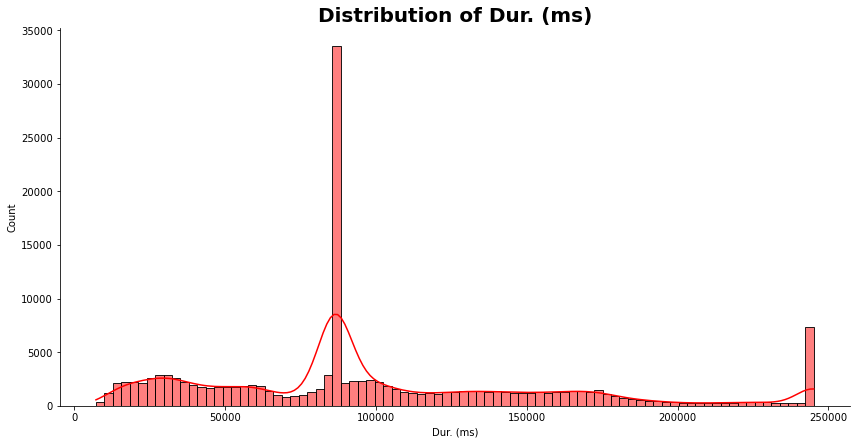

In [42]:
plot_hist(db, 'Dur. (ms)', 'Red')

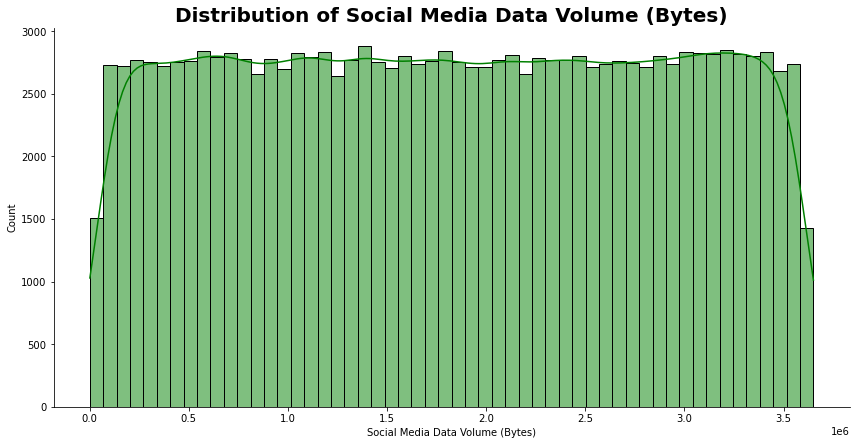

In [17]:
plot_hist(db, 'Social Media Data Volume (Bytes)', 'green')

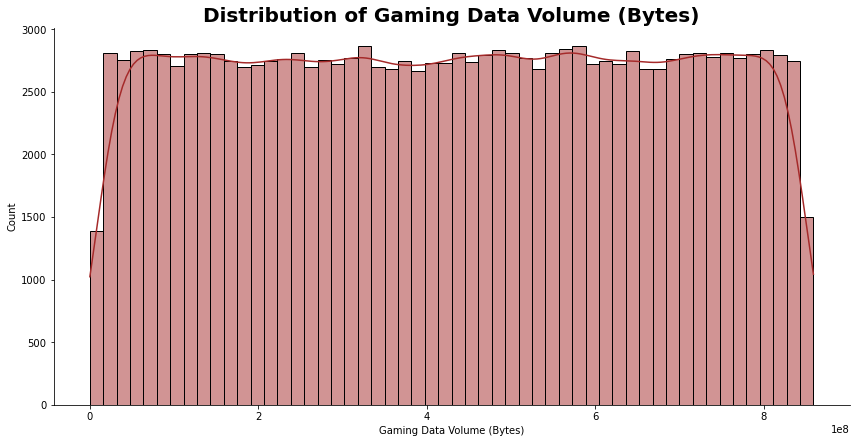

In [18]:
plot_hist(db, 'Gaming Data Volume (Bytes)', 'brown')

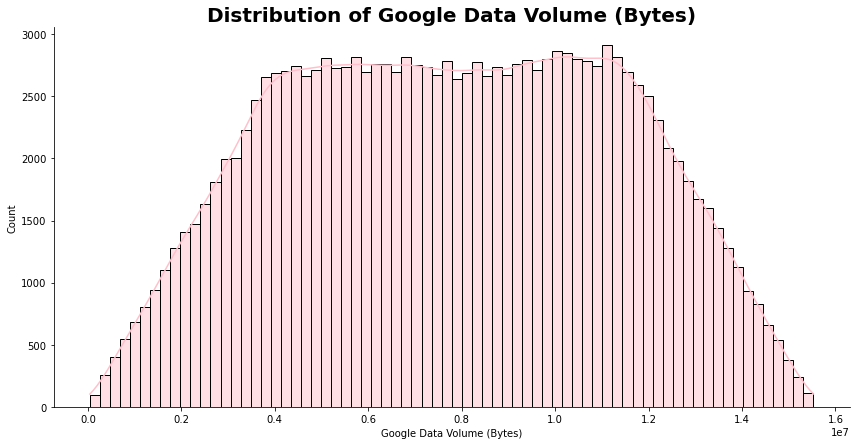

In [19]:
plot_hist(db, 'Google Data Volume (Bytes)', 'pink')

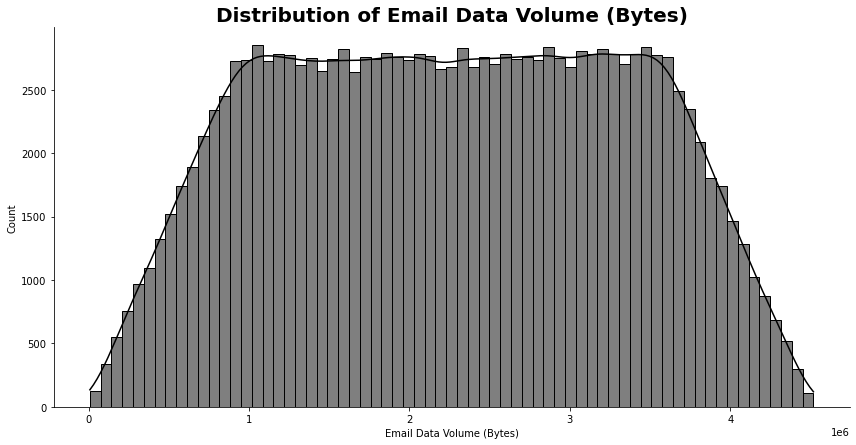

In [20]:
plot_hist(db, 'Email Data Volume (Bytes)', 'black')

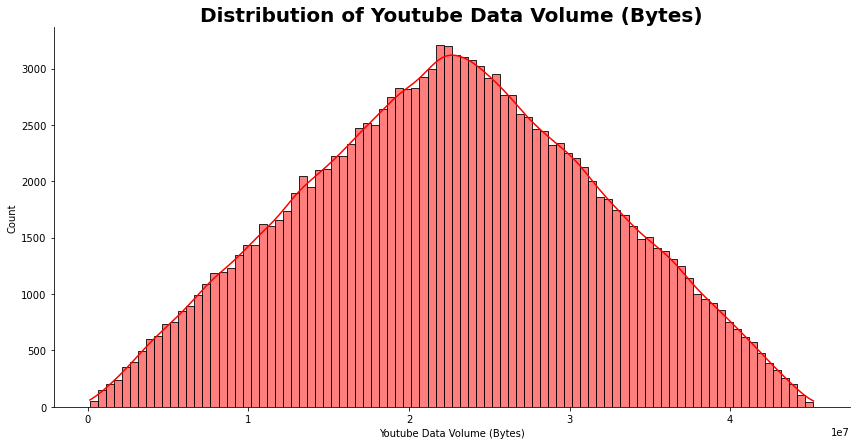

In [21]:
plot_hist(db, 'Youtube Data Volume (Bytes)', 'red')

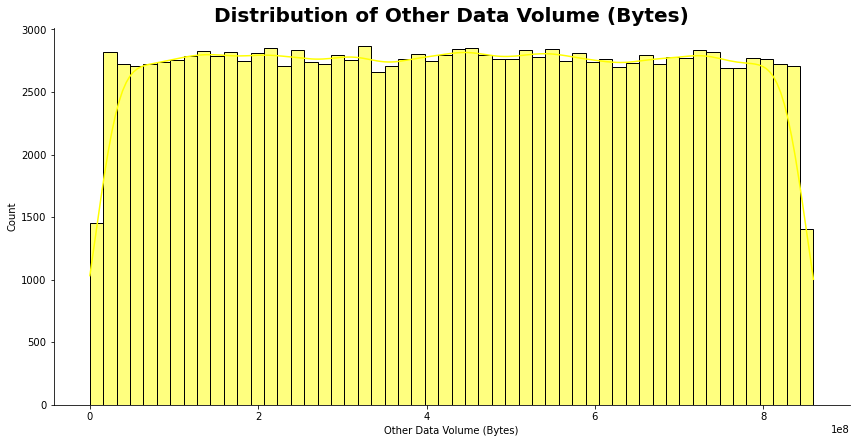

In [22]:
plot_hist(db, 'Other Data Volume (Bytes)', 'yellow')

### Bivariate Analysis

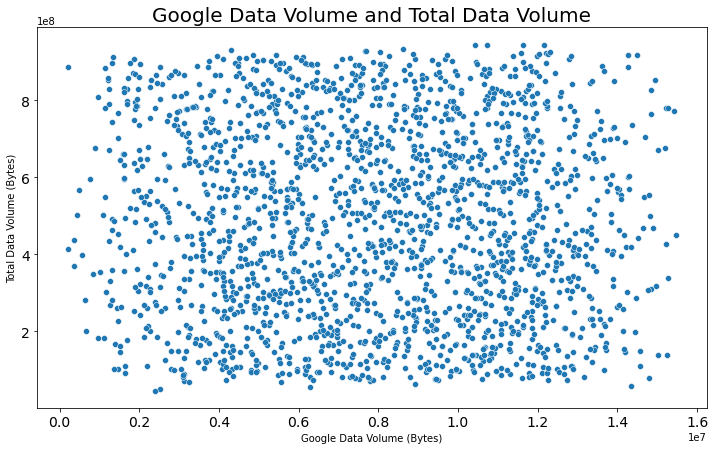

In [25]:
plot_scatter(db.sample(2000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Google Data Volume and Total Data Volume')

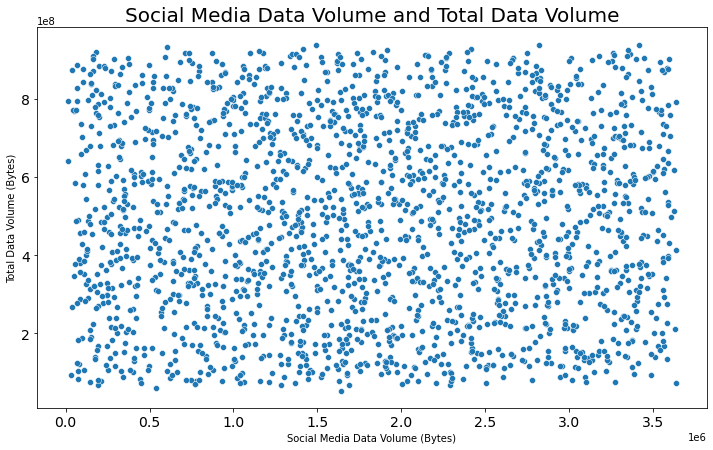

In [27]:
plot_scatter(db.sample(2000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Social Media Data Volume and Total Data Volume')

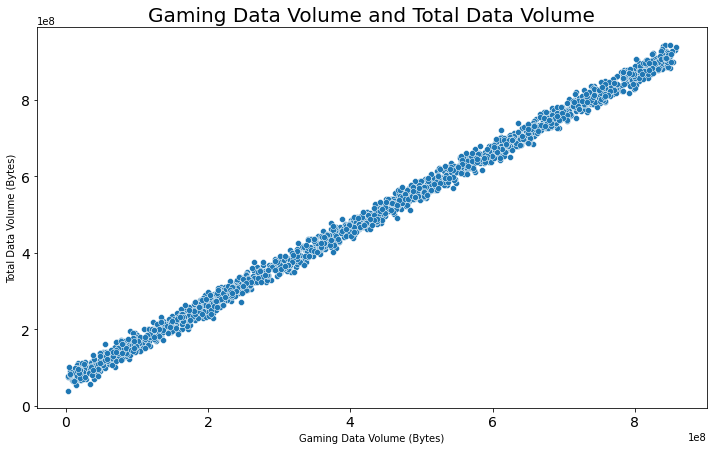

In [28]:
plot_scatter(db.sample(2000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)', 'Gaming Data Volume and Total Data Volume')

### Correlation

In [29]:


application_cols = ['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']

correlation = db[application_cols].corr()
correlation 



,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001933,0.004208,0.000570,0.001354,0.001894,0.005561
Google Data Volume (Bytes),-0.001933,1.000000,-0.000036,0.002172,-0.002018,-0.000800,-0.001268
Email Data Volume (Bytes),0.004208,-0.000036,1.000000,-0.003430,0.001518,0.000071,-0.000801
Youtube Data Volume (Bytes),0.000570,0.002172,-0.003430,1.000000,0.003604,-0.003674,0.003250
Netflix Data Volume (Bytes),0.001354,-0.002018,0.001518,0.003604,1.000000,-0.003546,-0.007924
Gaming Data Volume (Bytes),0.001894,-0.000800,0.000071,-0.003674,-0.003546,1.000000,-0.002814
Other Data Volume (Bytes),0.005561,-0.001268,-0.000801,0.003250,-0.007924,-0.002814,1.000000


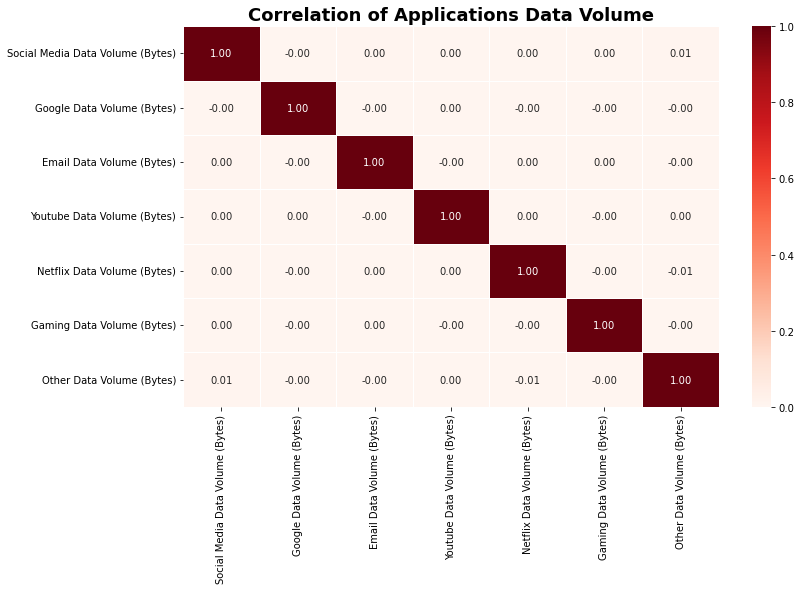

In [31]:
plot_heatmap(correlation, "Correlation of Applications Data Volume")